In [12]:
from pymongo import MongoClient
import pandas as pd
#import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display_html

In [13]:
#mongo conf
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["uefa"]
mycol = mydb["players"]

# Bar graph: top 10 highest scoring teams

<BarContainer object of 10 artists>

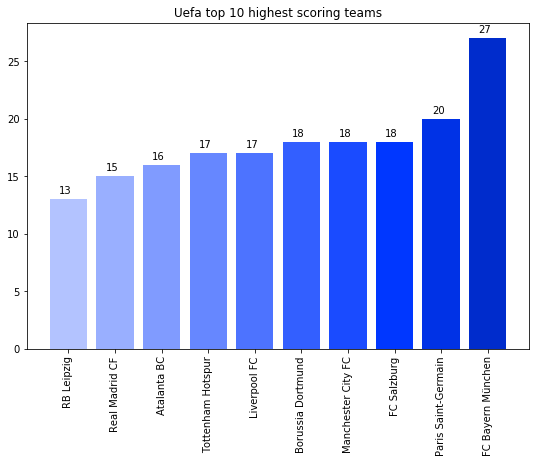

In [14]:
# query with aggregation: groups by team and sums the goals of every player of each team
query = [{"$group" : {"_id" : "$team", "totalgoals" : {"$sum" : "$goals"}}}]
teams = mycol.aggregate(query)

# save team names and goals in tuples, and the tuples in a list
teamList = []
for team in teams:
    teamName = team["_id"]
    goals = team["totalgoals"]
    new = ((teamName),(goals))
    teamList.append(new)
    
# pass the list into a dataframe, sort by goals and show only the last 10 teams
teams_df = pd.DataFrame(teamList, columns=["Teams:", "Goals:"])
ten_highest = teams_df.sort_values(by="Goals:").tail(10)

# save number of elements: goals and teams
nGoals = ten_highest["Goals:"]
nTeams = ten_highest["Teams:"]

# save bar colors
my_colors = ['#b3c3ff', '#99afff', '#809bff', '#6687ff', '#4d73ff', '#335fff', '#1a4bff', '#0037ff', '#0032e6', '#002ccc', '#0027b3', '#002199', '#001c80', '#001666', '#00114d', '#000d3a']

# set size of figure
fig = plt.figure(figsize = [9,6])

# set rotation of team names to 90 deg
plt.xticks(rotation=90)
plt.title("Uefa top 10 highest scoring teams")

# set text to show the number above each bar
for index, value in enumerate(ten_highest["Goals:"]):
    plt.text(index-0.2, value+0.5, str(value))

# show bar, with configuration values as arguments
plt.bar(height = nGoals, x = nTeams, color=my_colors)

# Graph with the red cards of the teams

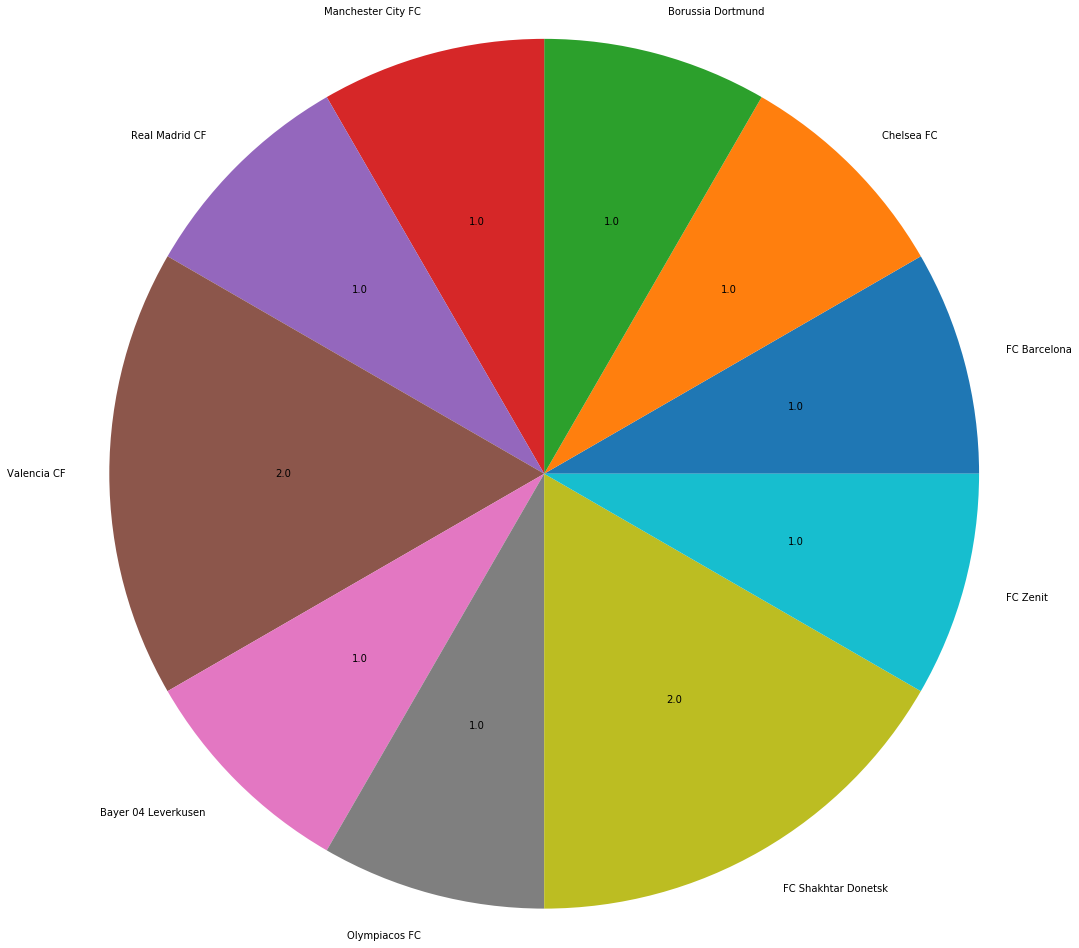

,Teams with zero cards
0,Atalanta BC
1,Club Atlético de Madrid
2,RB Leipzig
3,Paris Saint-Germain
4,FC Bayern München
5,Juventus
6,Liverpool FC
7,Olympique Lyonnais
8,SSC Napoli
9,Tottenham Hotspur


In [15]:
#All of teams with red cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of red cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and red cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "red cards" : 1}):
    total.append(item)

#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and isinstance(row["red cards"], int):
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["red cards"]/2
            else:
                score[team_name]=row["red cards"]/2
    i=i+1

#two dicts for teams that dont have any cards and for teams that have some cards
zero_cards={}
some_cards={}

#sorting the teams based on the number of their card
for k, v in score.items():
    if v == 0:
        zero_cards[k]=v
    else:
        some_cards[k]=v
        
#panda dataframe for the pie chart
df=pd.DataFrame(some_cards.items(), columns=['Team Name', 'Num of cards'])

#panda dataframe for teams with zero cards
zr=pd.DataFrame(zero_cards.keys(), columns=['Teams with zero cards'])

#function to round up number of cards
def absolute_value(val):
    
    a  = np.round(val/100.*df['Num of cards'].sum(), 0)
    return a


plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value,
    radius=5
    )

# View the plot
plt.show()

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
first30 = zr.head(30)
last30 = zr.tail(30)
first15 = first30.head(15)
second15 = first30.tail(15)
third15 = last30.head(15)
fourth15 = last30.tail(15)

display_side_by_side(first15, second15, third15, fourth15)

# Graph with the yellow cards of the teams

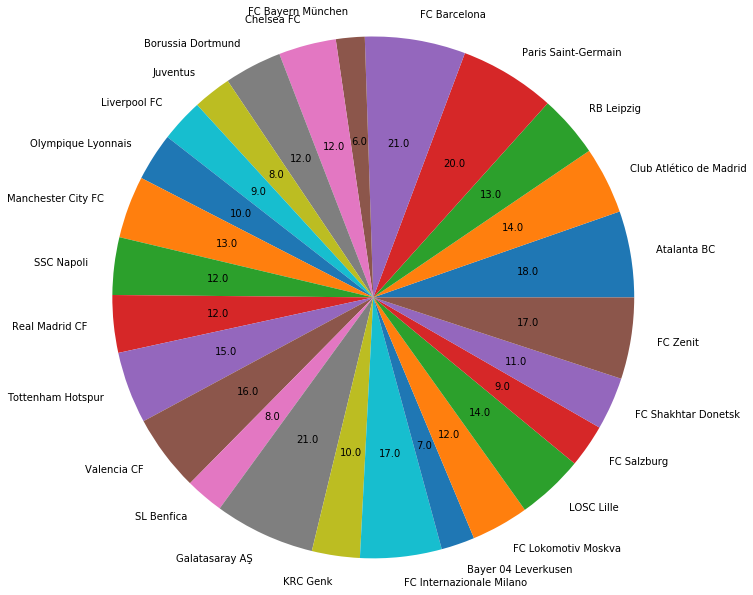

In [16]:
#All of teams with yellow cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of yellow cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and yellow cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "yellow cards" : 1}):
    total.append(item)

#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and isinstance(row["yellow cards"], int):
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["yellow cards"]/2
            else:
                score[team_name]=row["yellow cards"]/2
    i=i+1

#four dicts for teams that dont have any cards, two cards, three cards and for teams that have four or more cards
zero_cards={}
#one_cards={}
two_cards={}
three_cards={}
some_cards={}

for k, v in score.items():
    if v == 0:
        zero_cards[k]=v
    #elif v == 1:
        #one_cards[k]=v
    elif v == 2:
        two_cards[k]=v
    elif v == 3:
        three_cards[k]=v
    else:
        some_cards[k]=v
        
#panda dataframe for the pie chart
df=pd.DataFrame(some_cards.items(), columns=['Team Name', 'Num of cards'])

#panda dataframe for teams with zero cards
zr=pd.DataFrame(zero_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with one card
#one=pd.DataFrame(one_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with two cards
two = pd.DataFrame(two_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with three cards
th = pd.DataFrame(three_cards.keys(), columns=['Team Name'])

#function to round up number of cards
def absolute_value(val):
    
    a  = np.round(val/100.*df['Num of cards'].sum(), 0)
    return a

plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value,
    radius=3
    )

# View the plot
plt.show()

#create a table
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# fill table with zero cards
firstzr19 = zr.head(20)
lastzr19 = zr.tail(20)

firstzr15 = firstzr19.head(19)
secondzr15 = lastzr19.head(20)

# fill table with two card
firsttwo10 = two.head(10)
firsttwo5 = firsttwo10.head(5)

# fill table with three card
firstthree10 = th.head(10)
firstthree5 = firstthree10.head(5)

## Teams with zero cards

In [17]:
display_side_by_side(firstzr15, secondzr15)

,Team Name
0,AIK
1,APOEL FC
2,Ararat-Armenia FC
3,FC Astana
4,FC Basel 1893
5,FC BATE Borisov
6,Celtic FC
7,CFR 1907 Cluj
8,F.C. Copenhagen
9,F91 Dudelange


## No Teams with one card

## Teams with two cards

In [18]:
display_side_by_side(firsttwo5)

,Team Name
0,AFC Ajax
1,Club Brugge
2,FK Crvena zvezda
3,Olympiacos FC


## Teams with three cards

In [19]:
display_side_by_side(firstthree5)

,Team Name
0,GNK Dinamo Zagreb
1,SK Slavia Praha
